<a href="https://colab.research.google.com/github/hannah1809/Langtons_Ant/blob/main/Ant_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐜 Langtons Ant

In [9]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

#Load image of the ant
ant_image = plt.imread("/content/Ant_aka_Us.png")

### !! Choose Grid size, pattern and steps !!

In [10]:
# 1. Grid size
n = 12

# 2. Choose the initial pattern ('all_white', 'random', 'filled_rectangle', 'chess')
initial_pattern = 'all_white'

# 3. Adjust the number of steps (e.g. 20) or choose None for indefinite condition
steps = 10


## Grid

In [11]:
#Different starting environments: all white, random, filled rectangle and chess
def initialize_grid(pattern='all_white'):
    if pattern == 'all_white':
        return np.ones((n, n))
    elif pattern == 'random':
        return np.random.randint(0, 2, size=(n, n)) #binary matrix with ones or zeros
    elif pattern == 'filled_rectangle':
        grid = np.ones((n, n)) #initiate the grid "all white" first
        #position of the square:
        start_row, end_row = n // 4, 3 * n // 4
        start_col, end_col = n // 4, 3 * n // 4
        grid[start_row:end_row, start_col:end_col] = 0 #Fill square with zeros = black squares
        return grid
    elif pattern == 'chess':
        grid = np.zeros((n, n))  #initiate the grid "all black"
        for i in range(n):
            for j in range(n):
                if (i + j) % 2 == 0:  #if sum of row and column indices is even
                    grid[i, j] = 1
        return grid


def show_grid(grid, ant_pos):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)  # Adjust the figure size and DPI
    plt.imshow(grid, cmap='gray', vmin=0, vmax=1)
    plt.grid(True, which='both', color='black', linestyle='-', lw=0.5)
    plt.xlim(0.5, n - 0.5)
    plt.ylim(0.5, n - 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.xticks(np.arange(0.5, n, 1), minor=True)
    plt.yticks(np.arange(0.5, n, 1), minor=True)

    plt.imshow(ant_image, extent=[ant_pos[1] - 0.5, ant_pos[1] + 0.5, ant_pos[0] - 0.5, ant_pos[0] + 0.5], alpha=0.7)

    plt.show()


## Ant

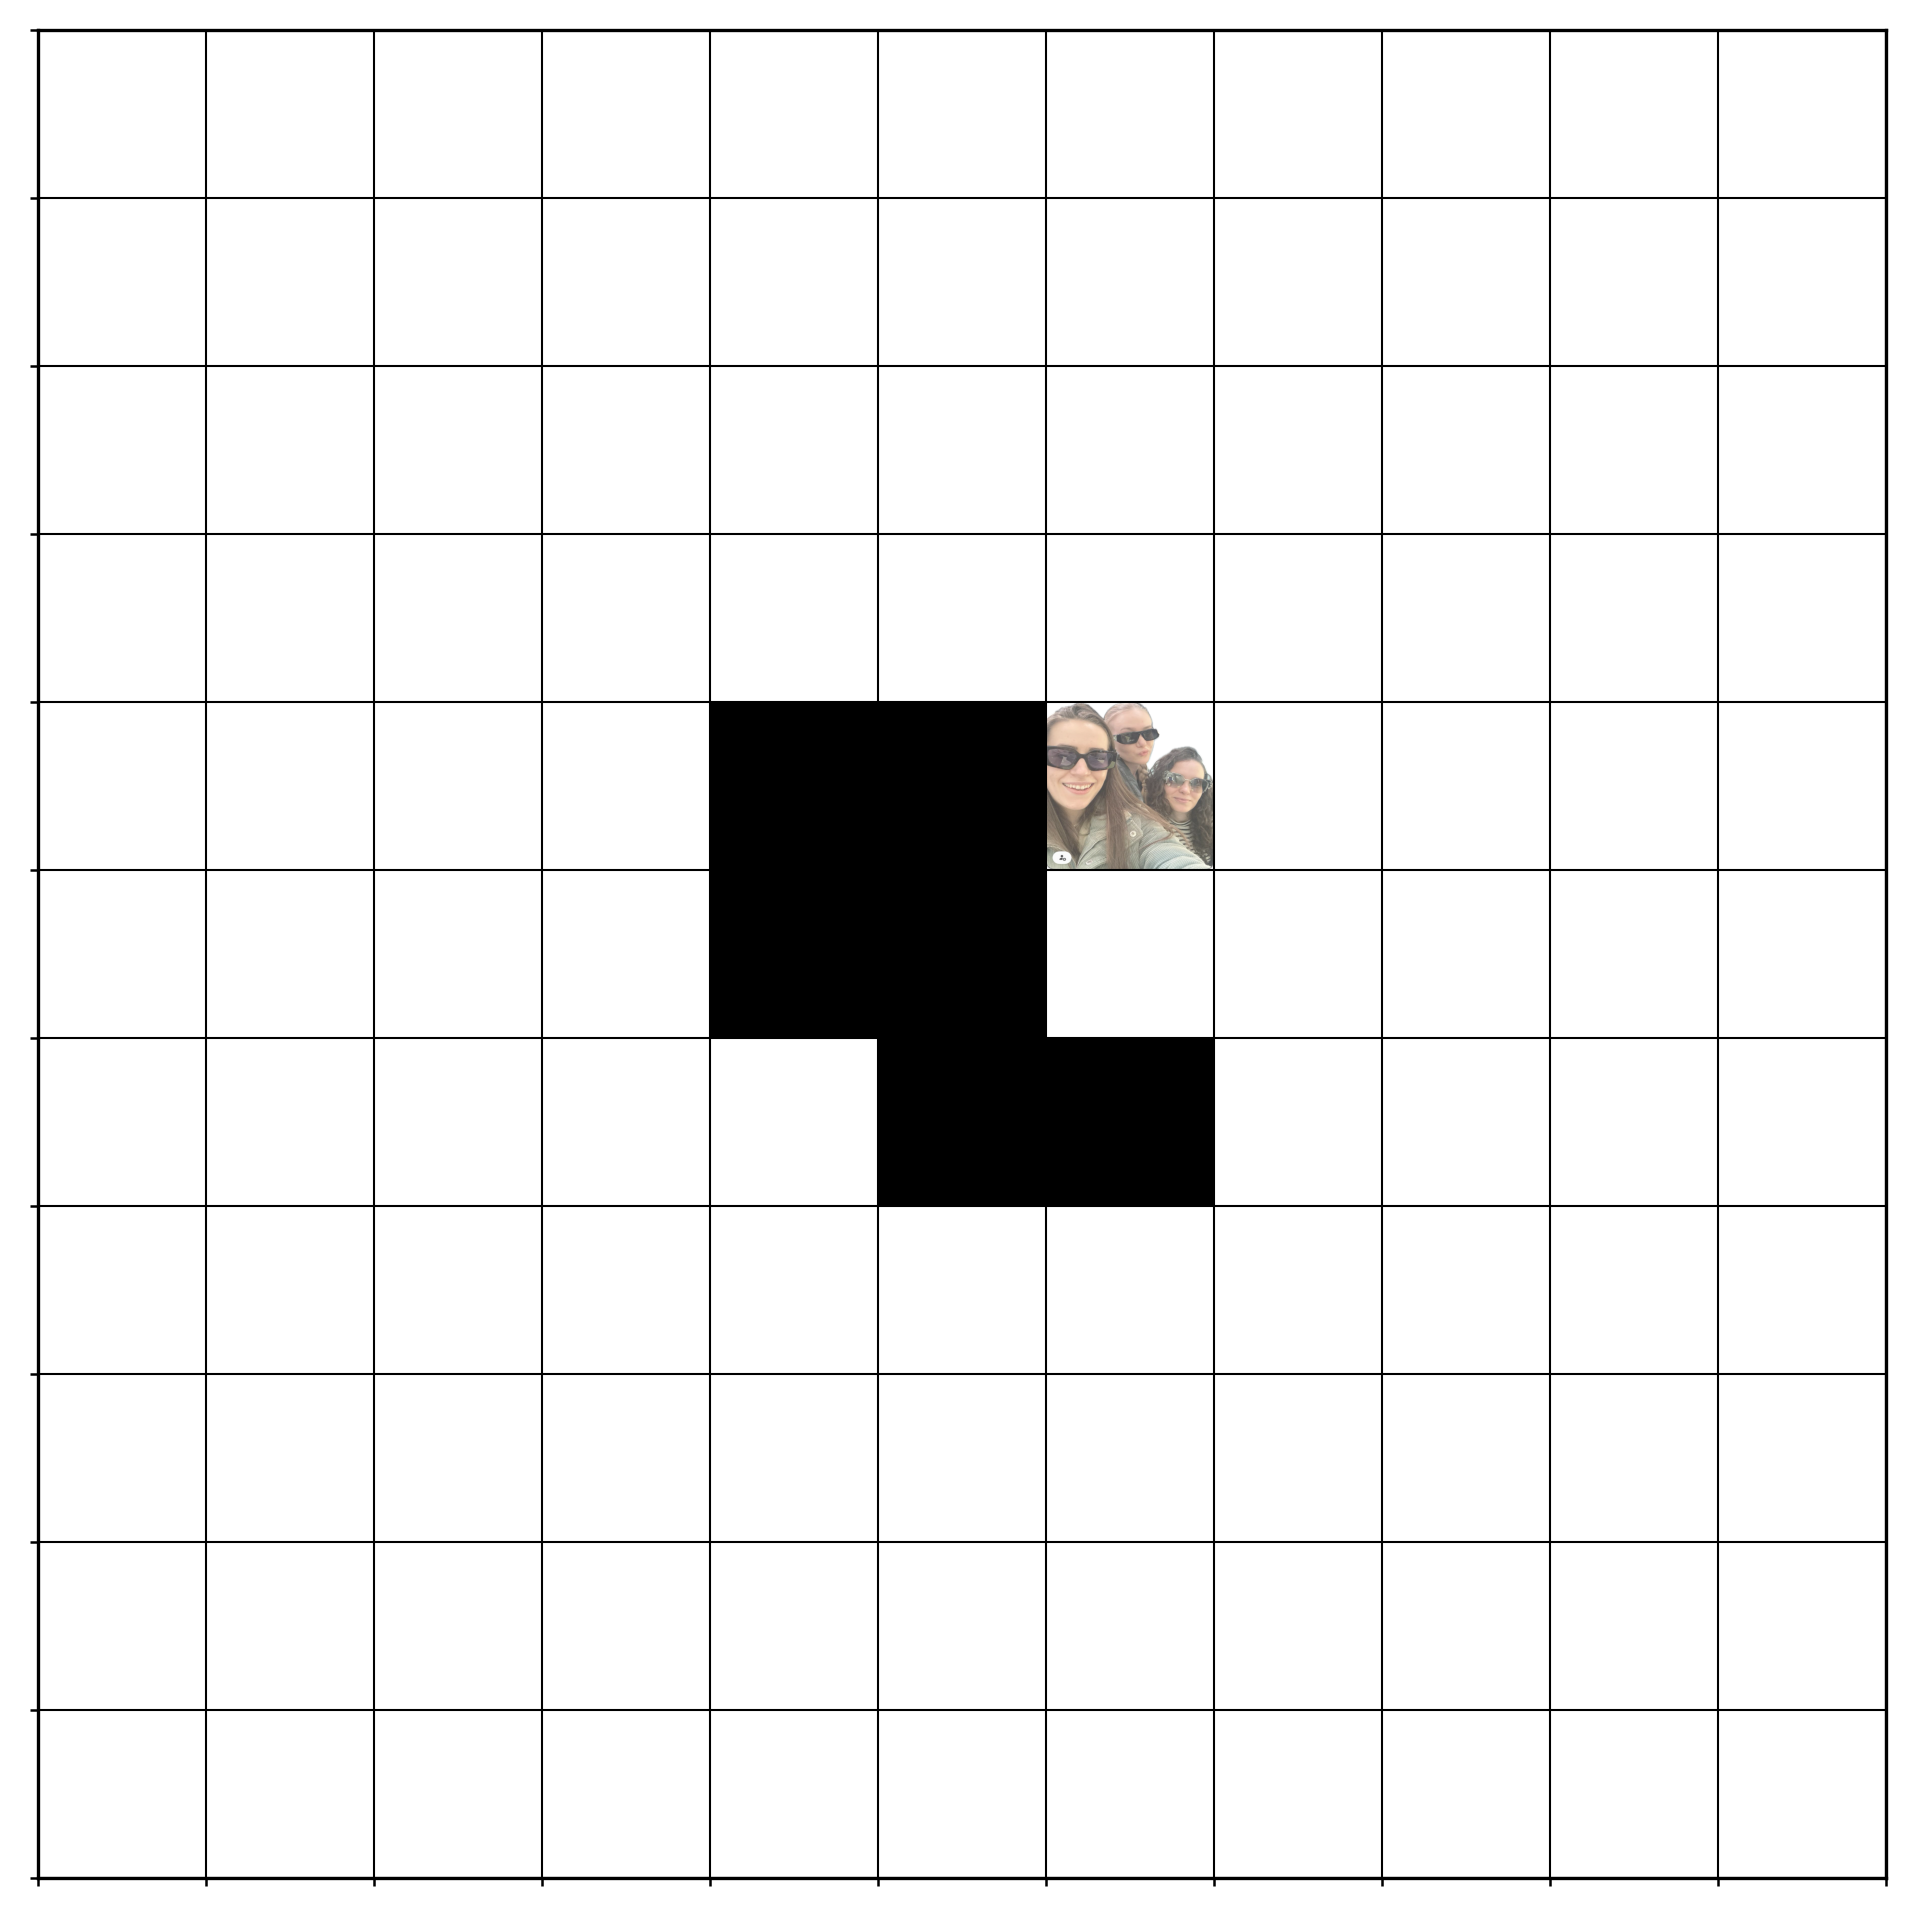

In [12]:
#Initial position of ant in the pattern
ant_pos = [n // 2, n // 2]
ant_dir = np.random.randint(0, 4)  #intial direction (0: up, 1: right, 2: down, 3: left)

#Animation of the ants movement
def update(steps=None):
    global ant_pos, ant_dir, grid

    if steps is None:
        while True:  # Run indefinitely until user decides to stop
            grid[ant_pos[0], ant_pos[1]] = 1 - grid[ant_pos[0], ant_pos[1]]  # update the value(colour) of the cell
            # Update the direction of the ant's movement based on the color of the cell it's on
            if grid[ant_pos[0], ant_pos[1]] == 1:  # If cell is white
                ant_dir = (ant_dir + 1) % 4  # Turn right
            else:
                ant_dir = (ant_dir - 1) % 4  # Turn left
            # Update the position of the ant based on its direction of movement
            if ant_dir == 0:  # If direction is up
                ant_pos[0] = (ant_pos[0] - 1) % n  # Move accordingly
            elif ant_dir == 1:  # If direction is right
                ant_pos[1] = (ant_pos[1] + 1) % n
            elif ant_dir == 2:  # If direction is down
                ant_pos[0] = (ant_pos[0] + 1) % n
            elif ant_dir == 3:  # If direction is left
                ant_pos[1] = (ant_pos[1] - 1) % n

            clear_output(wait=True)
            show_grid(grid, ant_pos)
            time.sleep(0.1)  # Delay for smooth animation

            if input("Press 'q' to quit, any other key to continue: ") == 'q':
                break  # Exit the loop if 'q' is pressed

    else:
        for step in range(1, steps + 1):
            grid[ant_pos[0], ant_pos[1]] = 1 - grid[ant_pos[0], ant_pos[1]]  # update the value(colour) of the cell
            # Update the direction of the ant's movement based on the color of the cell it's on
            if grid[ant_pos[0], ant_pos[1]] == 1:  # If cell is white
                ant_dir = (ant_dir + 1) % 4  # Turn right
            else:
                ant_dir = (ant_dir - 1) % 4  # Turn left
            # Update the position of the ant based on its direction of movement
            if ant_dir == 0:  # If direction is up
                ant_pos[0] = (ant_pos[0] - 1) % n  # Move accordingly
            elif ant_dir == 1:  # If direction is right
                ant_pos[1] = (ant_pos[1] + 1) % n
            elif ant_dir == 2:  # If direction is down
                ant_pos[0] = (ant_pos[0] + 1) % n
            elif ant_dir == 3:  # If direction is left
                ant_pos[1] = (ant_pos[1] - 1) % n

            clear_output(wait=True)
            show_grid(grid, ant_pos)
            time.sleep(0.1)  # Delay for smooth animation

#Initialize the grid based on the chosen pattern
grid = initialize_grid(pattern=initial_pattern)

#Create the animation
update(steps)